<a href="https://colab.research.google.com/github/IfeoluwaRuth/EDA_Global_animal_health_incidents/blob/main/EDA_Animal_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background study

### AIM:

This project aims to perform an exploratory analysis with a focus on visualizing incidents of animal health across countries worldwide.

### Objectives
1. Analyze the occurrence of animal diseases over the years (2005–2025).

2. Examine the distribution of species and diseases across different countries of the world.

### Data Source

Kaggle dataset on Global Animal Health Incident Reports (2005–2025):
🔗 Animal Health Incident Reports on Kaggle

### Data Background

This dataset contains standardized animal disease incident reports submitted to the World Organisation for Animal Health (WAHIS) over a 20-year period.

### Purpose

To understand how countries report animal disease incidents to WAHIS and identify patterns in reporting behavior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
filepath = '/content/animal_health_incidents.csv'
#df = pd.read_csv('animal_health_incidents.csv')
df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   report_id        5579 non-null   object 
 1   country          5579 non-null   object 
 2   region           0 non-null      float64
 3   date_reported    5579 non-null   object 
 4   species          5579 non-null   object 
 5   disease          5579 non-null   object 
 6   confirmed_cases  5579 non-null   int64  
 7   deaths           5579 non-null   int64  
 8   outbreak_status  5579 non-null   object 
 9   notes            5579 non-null   object 
 10  source           5579 non-null   object 
 11  latitude         0 non-null      float64
 12  longitude        0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 566.7+ KB


In [4]:
df.head(5)

,report_id,country,region,date_reported,species,disease,confirmed_cases,deaths,outbreak_status,notes,source,latitude,longitude,year
0,7cda1a50-2034-4b9a-b356-6219c91c13e1,Mongolia,NaN,2022-03-08,Unknown,Peste des petits ruminants virus (Inf. with),0,0,Resolved,First occurrence in a zone or a compartment,https://wahis.woah.org,NaN,NaN,2022
1,90e92d52-100a-46e8-9e00-27c3a0eec95f,Niger,NaN,2022-03-08,Unknown,Rift Valley fever virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN,2022
2,e6845074-51c6-4f05-adb7-c154ba203999,Israel,NaN,2022-03-06,Poultry,High pathogenicity avian influenza viruses (po...,0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN,2022
3,5ee290fe-e077-4fbb-afe7-924cfbbc5269,Kazakhstan,NaN,2022-03-04,Cattle,Foot and mouth disease virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN,2022
4,e9ca57c8-6e8e-4219-89ea-493cb1b1c6d6,China (People's Rep. of),NaN,2022-03-04,Unknown,Burkholderia mallei (Inf. with) (Glanders),0,0,Resolved,First occurrence in the country,https://wahis.woah.org,NaN,NaN,2022


Research Question 1:

How many animal disease incident were reported per year to World Organisation for animal health?

year
2005     75
2006    119
2007    129
2008    179
2009    205
Name: count, dtype: int64


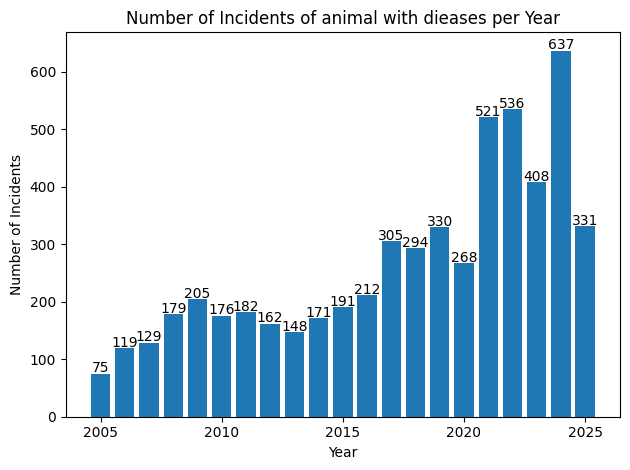

In [10]:
yearly_record = df['year'].value_counts().sort_index()
print(yearly_record.head())
plt.bar(yearly_record.index, yearly_record.values)

for i, value in enumerate(yearly_record.values):
    plt.text(x =yearly_record.index[i], y = value + 2, s = str(value), ha='center')

plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents of animal with dieases per Year')

plt.tight_layout()
plt.show()

#### Observation of Animal Disease Incidents Over the Years

The year 2005 recorded the lowest number of animal disease incidents with only 75 cases, while 2024 had the highest at 637 cases. From 2005 to 2020, there was a gradual upward trend in the number of reported incidents, indicating a consistent increase in either actual cases or reporting efforts.

From 2021 onward, the data shows a significant surge, suggesting a possible shift in reporting intensity, surveillance practices, or actual disease burden. This trend may reflect an increased emphasis on data-driven decision-making in animal health surveillance and intervention strategies.

In [3]:
# Group by year and count the number of unique diseases
df['date_reported'] = pd.to_datetime(df['date_reported'])
df['year'] = df['date_reported'].dt.year
disease_counts_by_year = df.groupby('year')['disease'].nunique()
disease_counts_by_year = pd.DataFrame(disease_counts_by_year).reset_index()
disease_counts_by_year.head()


,year,disease
0,2005,28
1,2006,25
2,2007,37
3,2008,42
4,2009,47


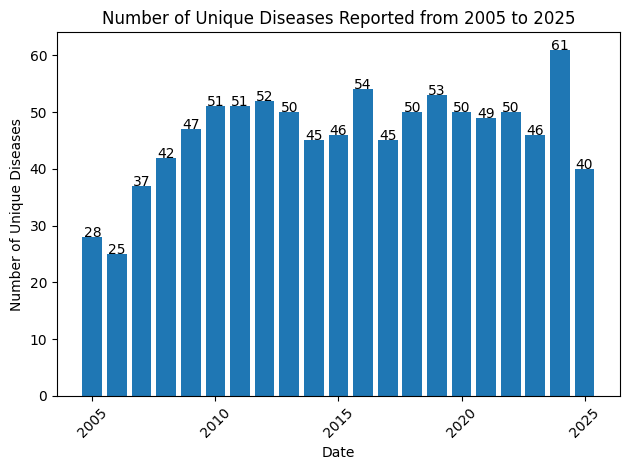

In [12]:
plt.bar(disease_counts_by_year['year'], disease_counts_by_year['disease'])
plt.xlabel('Date')
plt.ylabel('Number of Unique Diseases')
plt.title('Number of Unique Diseases Reported from 2005 to 2025')
plt.xticks(rotation=45)

for i, value in enumerate(disease_counts_by_year['disease']):
    plt.text(x =disease_counts_by_year['year'][i], y = value, s = str(value), ha='center')

plt.tight_layout()
plt.show()

The occurance of diseases varies over the year (2005 to 2025) across the globe. However, year 2006 has the lowest occureance of  

In [ ]:
df['disease'].unique()

array(['Peste des petits ruminants virus (Inf. with)',
       'Rift Valley fever virus (Inf. with)',
       'High pathogenicity avian influenza viruses (poultry) (Inf. with)',
       'Foot and mouth disease virus (Inf. with)',
       'Burkholderia mallei (Inf. with) (Glanders)',
       'Sheep pox and goat pox',
       'Influenza A viruses of high pathogenicity (Inf. with) (non-poultry including wild birds) (2017-)',
       'Theileria equi and Babesia caballi (Inf. with) (Equine piroplasmosis)',
       'African swine fever virus (Inf. with)',
       'SARS-CoV-2 in animals (Inf. with)',
       'Viral haemorrhagic septicaemia virus (Inf. with)',
       'Newcastle disease virus (Inf. with)',
       'Aphanomyces astaci (Inf. with)(Crayfish plague)',
       'Aethina tumida (Inf. with)(Small hive beetle)(2006-)',
       'Leishmania spp. (Inf. with) (Leishmaniosis)',
       'Rabies virus (Inf. with)',
       'Infectious salmon anaemia virus (Inf. with) (HPR-deleted or HPR0 genotypes)',
       

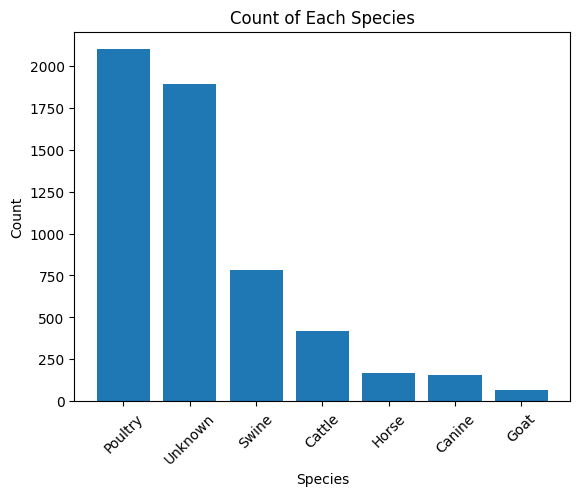

In [ ]:
species_counts = df['species'].value_counts()
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Each Species')
plt.xticks(rotation=45)  # Optional: rotate labels if they overlap
plt.show()

In [ ]:
disease_species_map = {
    'Melissococcus plutonius (Inf. of honey bees with) (European foulbrood)': ['Honey bee'],
    'New world screwworm (Cochliomyia hominivorax)': ['Cattle', 'Swine', 'Sheep'],
    'Fowl typhoid': ['Poultry'],
    'Equine arteritis virus (Inf. with)': ['Horse'],
    'Equine influenza virus (Inf. with)': ['Horse'],
    'Crimean Congo haemorrhagic fever (2006-)': ['Unknown'],
    'Echinococcus granulosus (Inf. with) (2014-)':['Unknown'],
    'Tropilaelaps spp. (Inf. of honey bees with)': ['Honey bee'],
    'Duck virus hepatitis':['Poultry'],
    'Mycoplasma synoviae (Avian mycoplasmosis) (Inf. with) (2006-)': ['Poultry'],
    'Haemorrhagic septicaemia (Pasteurella multocida serotypes 6:b and 6:e)': ['Cattle'],
    'Maedi-visna': ['Sheep'],
    'Xenohaliotis californiensis (Inf. with)':['Fish'],
    'Aeromonas hydrophila (Inf. with)': ['Fish'],
    'Bovine anaplasmosis': ['Cattle'],
    'Coxiella burnetii (Q fever) (Inf. with)': ['Cattle', 'Sheep', 'Goat'],
    'Equine encephalomyelitis (Eastern)(2006-)': ['Horse'],
    'Old world screwworm (Chrysomya bezziana)': ['Unknown'],
    'Equine rhinopneumonitis (-2013)': ['Horse'],
    'Equine encephalomyelitis (Eastern and Western)(-2005)': ['Horse'],
    'Botulism (-2014)': ['Unknown'],
    'Streptococcus suis (Inf. with)': ['Swine'],
    'White spot syndrome virus (Inf. with)': ['Fish'],
    'Infectious bursal disease (Gumboro disease)': ['Poultry'],
    'Infectious hypodermal and haematopoietic necrosis virus (Inf. with)': ['Fish'],
    'Equine encephalomyelitis (Western)(2006-)': ['Horse'],
    'Camelpox virus (inf. with)': ['Camel'],
    'Turkey rhinotracheitis (2006-)': ['Poultry'],
    'Trypanosoma Brucei, T. Congolense, T. Simiae and T. Vivax (Inf. with) (2022-)': ['Cattle', 'Canine'],
    'Tilapia lake virus (Inf. with) (2023-)': ['Fish'],
    'Red sea bream iridovirus (Inf. with) (-2024)':['Fish'],
    'Heartwater': ['Cattle', 'Goat', 'Sheep'],
    'Mikrocytos mimicus n. sp. (Inf. with)':['Fish'],
    'Avian chlamydiosis': ['Birds'],
    'Bonamia exitiosa (Inf. with)': ['Fish'],
    'Bovine tuberculosis (-2018)': ['Cattle'],
    'Brucella abortus (Inf. with)': ['Cattle'],
    'Echinococcosis/hydatidosis': ['Dog', 'Sheep'],
    'Bovine genital campylobacteriosis': ['Cattle'],
    'Taura syndrome virus (Inf. with)': ['Fish'],
    'Ovine epididymitis (Brucella ovis)': ['Sheep'],
    'Perkinsus marinus (Inf. with)': ['Fish'],
    'Batrachochytrium salamandrivorans (Inf. with)(2014-)': 'Salamanders',
    'Bovine pestiviruses (Bovine viral diarrhoea) (Inf. with)': ['Cattle'],
    'Abalone herpesvirus (Inf. with)':['Fish'],
    'Trypanosomosis (tsetse-transmitted) (-2021)': ['Cattle', 'Canine'],
    'Swine vesicular disease (-2014)': ['Swine'],
    'Marteilia refringens (Inf. with)': ['Fish'],
    'Dourine': ['Horse'],
    'Pullorum disease': ['Poultry'],
    'Hendra viruses (Inf. with)': ['Horse', 'Bat'],
    'Influenza A virus (Inf. with)': ['Avian', 'Swine', 'Human'],
    'Chlamydia abortus (Inf. with) (Enzootic abortion of ewes, ovine chlamydiosis)': ['Sheep'],
    'Schmallenberg virus (Inf. with)': ['Cattle', 'Sheep', 'Goat',],
    'New disease in rainbow trout': ['Fish'],
    'Monkey pox':['Unknown'],
    'Equine encephalosis virus (Inf. with)': ['Horse'],
    'Infectious myonecrosis virus (Inf. with)(2008-)':['Fish'],
    'Postweaning Multisystemic Wasting Syndrome (PMWS)': ['Swine'],
    'Trichinella spp. (Inf. with)': ['Swine'],
    'Macrobrachium rosenbergii nodavirus (Inf. with) (White tail disease) (2008-)': ['Fish'],
    'Malignant catarrhal fever (wildebeest only)(2006-2008)': ['Cattle (accidental host)','Canine'],
    'Mycobacterium tuberculosis (Inf. with)(-2017)': ['Unknown'],
    'Batrachochytrium dendrobatidis (Inf. with)(2009-)': 'Amphibians',
    'Contagious caprine pleuropneumonia': ['Goat'],
    'Acute hepatopancreatic necrosis disease (2016-)': ['Shrimp'],
    'Megalocytivirus pagrus 1 (Inf. with) (2025-)':['Fish'],
    'Acarapis woodi (Inf. of honey bees with)': ['Honey bee'],
    'Paratuberculosis': ['Cattle', 'Goat', 'Sheep'],
    'Trypanosoma evansi (Surra) (Inf. with)': ['Horse'],
    'Pigeon rotavirus': ['Bird'],
    'Ehrlichia canis (Inf. with)': ['Canine'],
    'Hepatopancreatitis in prawns': ['Fish'],
    'Pox viruses (other than those listed by the OIE)(Inf. with)(2011-)':['Unknown'],
    'African horse sickness virus (Inf. with)': ['Horse']
}


In [ ]:
def assign_species(row):
    possible_species = disease_species_map.get(row['disease'])

    # If disease not in map, return existing or 'Unknown'
    if not possible_species:
        return row['species'] if pd.notnull(row['species']) else 'Unknown'

    # If only one species listed, return it
    if len(possible_species) == 1:
        return possible_species[0]

    # If multiple species, check if one of them is already assigned
    current_species = row['species']
    if current_species in possible_species:
        return current_species
    else:
        return 'Unknown'


In [ ]:
df['species'] = df.apply(assign_species, axis=1)

In [ ]:
pd.crosstab(df['disease'], df['species'])

species,Bird,Birds,Camel,Canine,Cattle,Fish,Goat,Honey bee,Horse,Poultry,Sheep,Shrimp,Swine,Unknown
disease,,,,,,,,,,,,,,
Abalone herpesvirus (Inf. with),0,0,0,0,0,1,0,0,0,0,0,0,0,0
Acarapis woodi (Inf. of honey bees with),0,0,0,0,0,0,0,1,0,0,0,0,0,0
Acute hepatopancreatic necrosis disease (2016-),0,0,0,0,0,0,0,0,0,0,0,6,0,0
Aeromonas hydrophila (Inf. with),0,0,0,0,0,1,0,0,0,0,0,0,0,0
Aethina tumida (Inf. with)(Small hive beetle)(2006-),0,0,0,0,0,0,0,0,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vesicular stomatitis (-2014),0,0,0,0,0,0,0,0,0,0,0,0,0,18
Viral haemorrhagic septicaemia virus (Inf. with),0,0,0,0,0,0,0,0,0,0,0,0,0,32
West Nile Fever,0,0,0,0,0,0,0,0,0,0,0,0,0,133


In [ ]:
df['outbreak_status'].unique()

array(['Resolved'], dtype=object)

In [ ]:
def country_selected(df, country):
    # Filter and subset the DataFrame
    df = df[df['country'] == country][['country', 'year', 'species', 'disease']]

    # Group by year and count unique diseases
    disease_counts_by_year = df.groupby('year')['disease'].nunique().reset_index()

    # Plot 1: Number of Unique Diseases Reported Over Year
    plt.figure(figsize=(8, 5))
    plt.bar(disease_counts_by_year['year'], disease_counts_by_year['disease'])
    plt.xlabel('Year')
    plt.ylabel('Number of Unique Diseases')
    plt.title(f'Unique Diseases Reported in {country} Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot 2: Count of Each Species
    species_counts = df['species'].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(species_counts.index, species_counts.values)
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.title(f'Species Reported in {country}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot 3: Count of Each Disease
    disease_counts = df['disease'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(disease_counts.index, disease_counts.values)
    plt.xlabel('Disease')
    plt.ylabel('Count')
    plt.title(f'Diseases Reported in {country}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


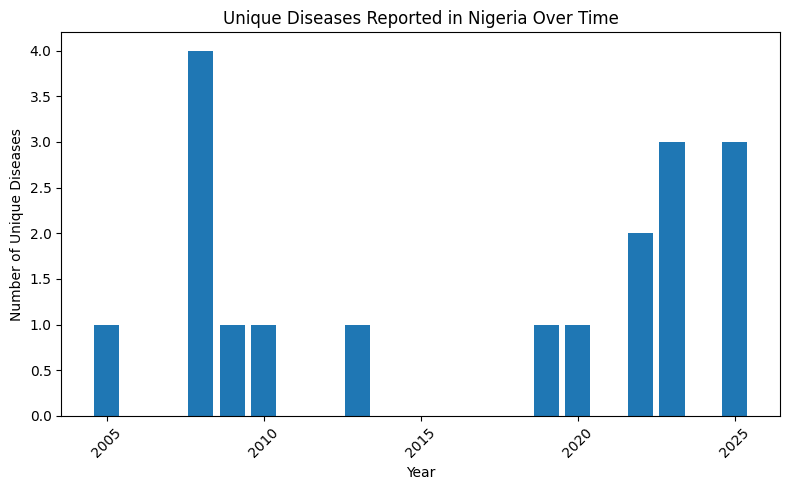

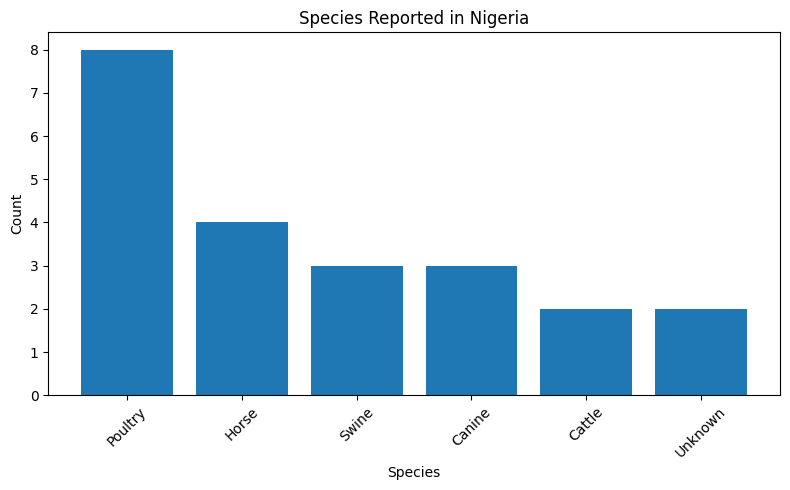

<ipython-input-12-1f7eb492e5f6>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


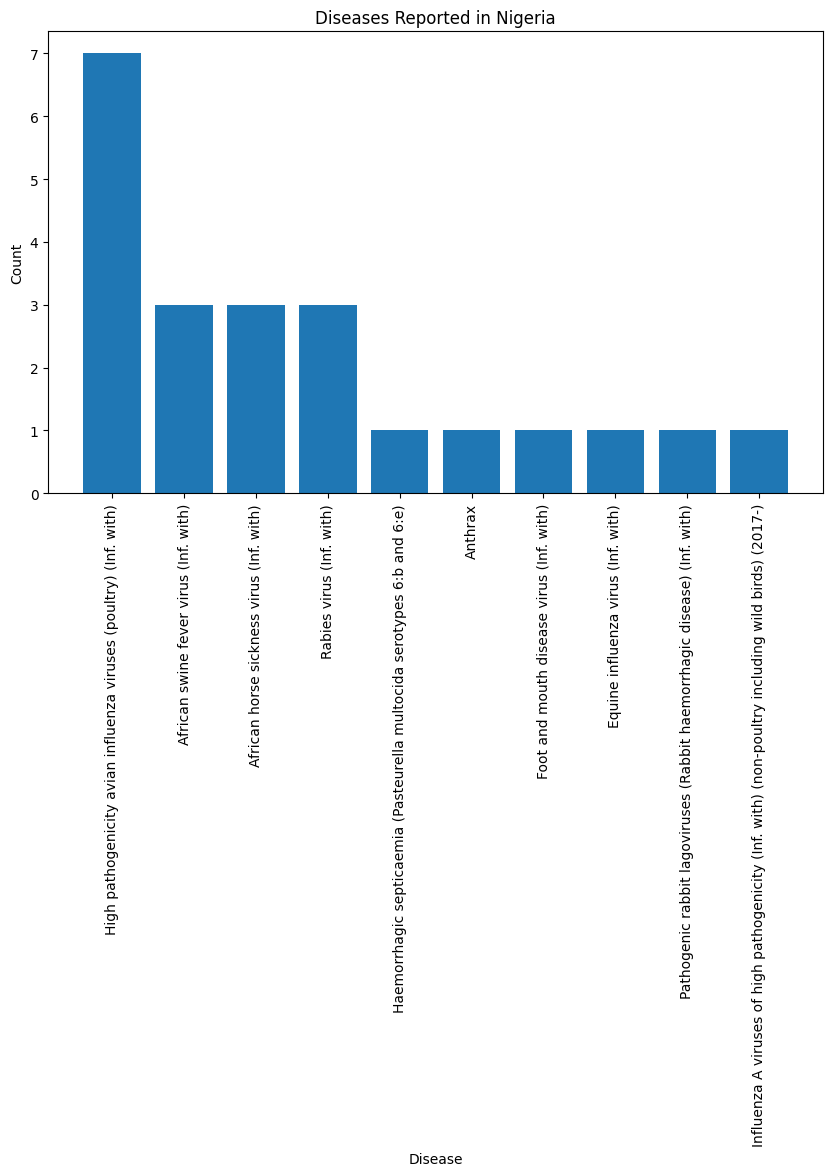

In [ ]:
country_selected(df, 'Nigeria')

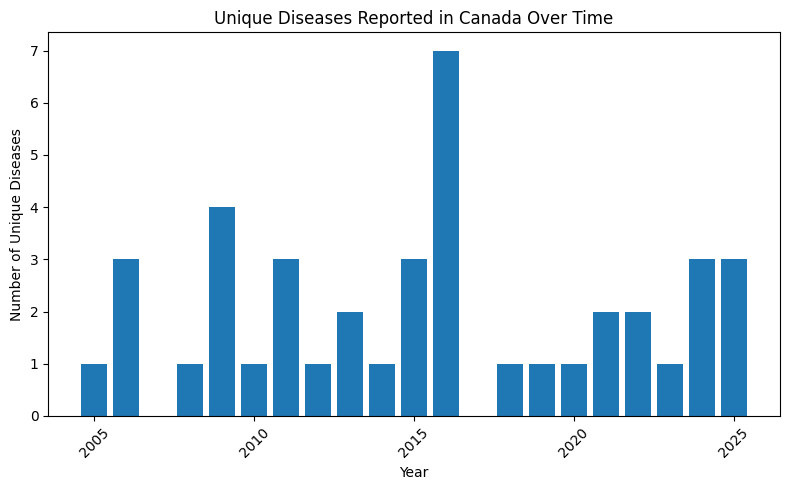

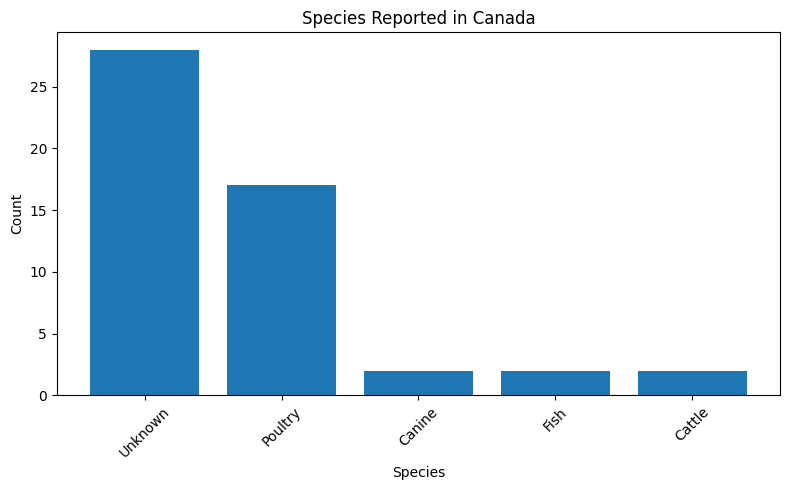

<ipython-input-12-1f7eb492e5f6>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


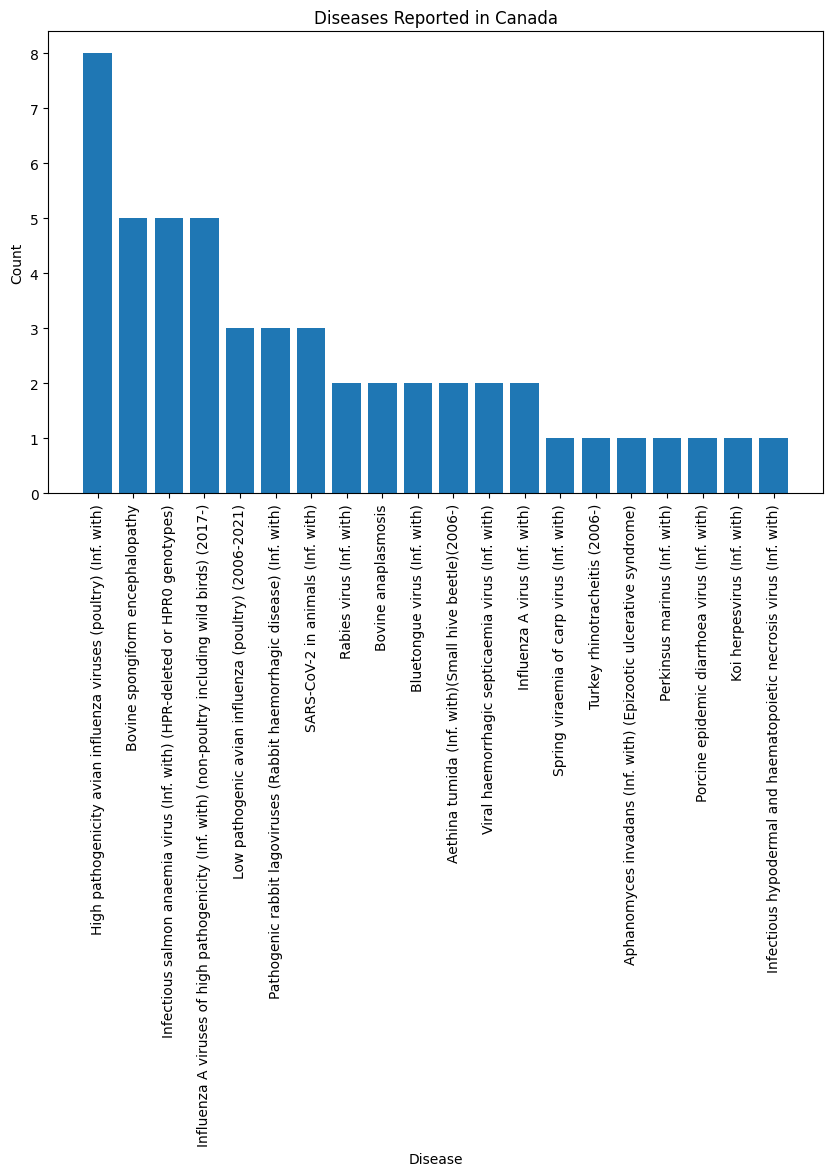

In [ ]:
country_selected(df, 'Canada')